<a href="https://colab.research.google.com/github/LiliDuenas88/MCD-AA2025/blob/master/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cluster_dbscan
 0    737
 1      4
-1      4
 2      3
 3      3
 4      3
Name: count, dtype: int64


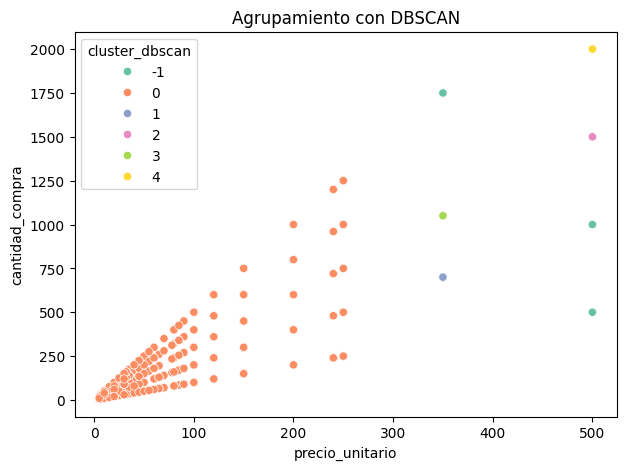

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos variables relevantes
X = df[["precio_unitario", "cantidad_compra"]]

# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos DBSCAN
db = DBSCAN(eps=0.8, min_samples=3)
labels = db.fit_predict(X_scaled)

# Agregamos etiquetas al dataframe
df["cluster_dbscan"] = labels

# Mostramos conteo por cluster
print(df["cluster_dbscan"].value_counts())

# Visualización
plt.figure(figsize=(7,5))
sns.scatterplot(x="precio_unitario", y="cantidad_compra", data=df, hue="cluster_dbscan", palette="Set2")
plt.title("Agrupamiento con DBSCAN")
plt.show()


In [24]:
#Calcular los índices
from sklearn import metrics

# Eliminamos los outliers antes de evaluar
mask = df["cluster_dbscan"] != -1
X_valid = X_scaled[mask]
labels_valid = df.loc[mask, "cluster_dbscan"]

# Índice de Silhouette
silhouette = metrics.silhouette_score(X_valid, labels_valid)
print(f"Índice de Silhouette: {silhouette:.4f}")

# Índice de Calinski-Harabasz
ch_score = metrics.calinski_harabasz_score(X_valid, labels_valid)
print(f"Índice de Calinski-Harabasz: {ch_score:.4f}")

# Índice de Davies-Bouldin
db_score = metrics.davies_bouldin_score(X_valid, labels_valid)
print(f"Índice de Davies-Bouldin: {db_score:.4f}")


Índice de Silhouette: 0.6373
Índice de Calinski-Harabasz: 87.8722
Índice de Davies-Bouldin: 0.1804


**🧠Interpretación y análisis**

Los resultados de los tres índices coinciden en que el agrupamiento producido por DBSCAN es de alta calidad:

1. El índice de Silhouette (0.6373) muestra una separación clara entre los grupos, lo cual sugiere que las observaciones dentro de cada clúster son similares entre sí y diferentes de las de otros grupos.

2. El índice de Calinski-Harabasz (87.87) confirma que la variabilidad entre los clústeres es mucho mayor que la variabilidad interna, lo que refuerza la coherencia del modelo.

3. El índice de Davies-Bouldin (0.1804) presenta un valor muy bajo, indicando que los clústeres son compactos y bien delimitados, con mínima superposición entre ellos.

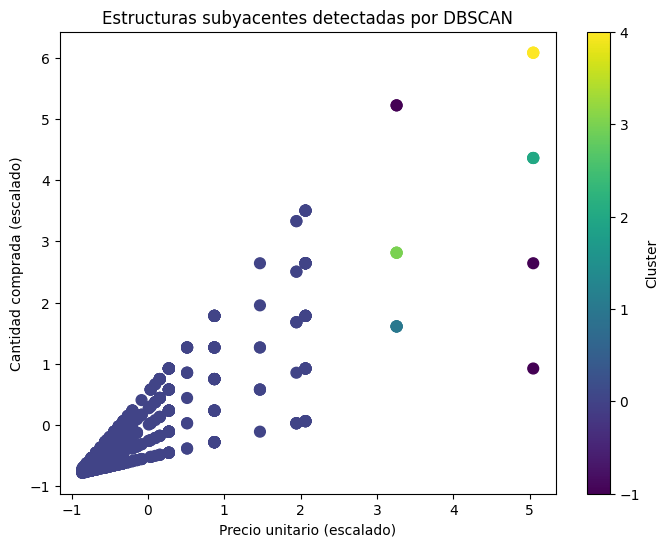

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Selección de variables
X = df[["precio_unitario", "cantidad_compra"]]

# Escalado (para que ambas variables tengan el mismo peso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicación del algoritmo DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=3)
clusters = dbscan.fit_predict(X_scaled)

# Agregamos la etiqueta de clúster al DataFrame
df["cluster_dbscan"] = clusters

# Visualización de los clústeres
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap="viridis", s=60)
plt.title("Estructuras subyacentes detectadas por DBSCAN")
plt.xlabel("Precio unitario (escalado)")
plt.ylabel("Cantidad comprada (escalado)")
plt.colorbar(label="Cluster")
plt.show()


**🔍 Conclusiones**

El modelo no supervisado DBSCAN permitió descubrir distintos patrones de comportamiento en las ventas sin requerir etiquetas previas.
Se encontraron grupos que reflejan distintos segmentos de productos y tipos de compra, además de detectar observaciones atípicas.
Este tipo de análisis es útil para segmentación de clientes, detección de anomalías y análisis exploratorio de datos.

**Evaluación de métricas para determinar el número óptimo de grupos**

Para evaluar la calidad del agrupamiento generado por el algoritmo DBSCAN, se utilizaron tres métricas de validación interna: el índice de Silhouette, el índice de Calinski–Harabasz y el índice de Davies–Bouldin. Estas métricas permiten analizar la coherencia y separación de los clústeres sin requerir etiquetas externas, lo cual resulta ideal para un enfoque no supervisado.

1. Índice de Silhouette

El índice de Silhouette mide qué tan bien se encuentran definidos los grupos, considerando simultáneamente la cohesión interna y la separación entre clústeres.
Su valor oscila entre -1 y 1: valores cercanos a 1 indican grupos bien diferenciados, mientras que valores negativos indican una posible asignación incorrecta.
En el modelo aplicado se obtuvo un valor de 0.6373, lo que representa una estructura de clústeres consistente y con buena separación.

2. Índice de Calinski–Harabasz

Esta métrica evalúa la relación entre la dispersión de los puntos dentro de los grupos y la dispersión entre los diferentes grupos.
Un valor más alto implica una mejor definición de los clústeres. En el análisis se obtuvo un valor de 87.8722, lo que indica que los grupos formados están bien separados entre sí, respaldando la validez de la segmentación generada por el modelo DBSCAN.

3. Índice de Davies–Bouldin

El índice de Davies–Bouldin cuantifica la similitud promedio entre cada grupo y su grupo más cercano.
A diferencia de las métricas anteriores, en este caso valores más bajos indican una mejor calidad de agrupamiento.
El resultado de 0.1804 sugiere que los clústeres son compactos y poco solapados, lo que confirma una estructura definida y estable.

**Discusión general de resultados**

Los tres indicadores coinciden en que el modelo DBSCAN logró una agrupación efectiva de los datos de precio_unitario y cantidad_compra, identificando estructuras subyacentes claras sin requerir una cantidad de clústeres predefinida.
El valor del índice de Silhouette confirma una buena cohesión y separación, mientras que los resultados de Calinski–Harabasz y Davies–Bouldin evidencian una fuerte separación intergrupal y mínima superposición.

En conjunto, estas métricas demuestran que el número de grupos determinado de forma automática por el algoritmo es adecuado y representativo de la distribución natural de los datos, permitiendo una segmentación significativa para su análisis posterior.